### Please type your full name in the following box

### Please enter your Exam version in the following box

### Please rename your file as  `firstname_lastname_section_number_version`

In [38]:
# Please run this  cell first
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
import pingouin as pg

students = [
{'ID': '869', 'first': 'Ed','last':'Lee','age': 23, 'phone':'607-555-5555'},
{'ID': '136', 'first': 'Di','last':'Ray','age': 21,'phone':'711-132-1076'},
{'ID': '225', 'first': 'Sarah','last':'King','age': 25,'phone':'205-111-9098'},
{'ID': '076', 'first': 'Jane','last': 'Parker','age': 22,'phone':'100-500-1000'}
]

LINK_COVID = 'https://www.dropbox.com/s/6wny3wrey1pjbrp/covid_exam.csv?raw=1'
LINK_COVID_POP = 'https://www.dropbox.com/s/j95vpgu19nukreu/covid_exam_2.csv?raw=1'


df_covid = pd.read_csv(LINK_COVID)
df_covid_pop = pd.read_csv(LINK_COVID_POP)


In [8]:
# Q 1: total 10
#8 points
import statistics
ages = [item['age'] for item in students]

# 2 points
print(f'average age is {statistics.mean(ages)}')

# note: they may use different ways for finidng mean
# if not used f-string: -1

average age is 22.75


In [9]:
# Q 2: 5 points
lasts = [item['last'] for item in students]


['Lee', 'Ray', 'King', 'Parker']

In [18]:
# Q 3: 10 points
# note: they may very different methods to find the
# answer. If the logic is correct, they should be fine.

lasts = [item['last'] for item in students]
lasts.sort(reverse = True, key = lambda x: len(x))
print(f'longest last name is {lasts[0]}')

longest last name is Parker


In [39]:
# Q 4: 5 points
# note: they may use len function as well. It is on
print(f'number of rows: {df_covid.shape[0]}')
print(f'number of columns: {df_covid.shape[1]}')


number of rows: 239
number of columns: 14


<AxesSubplot:>

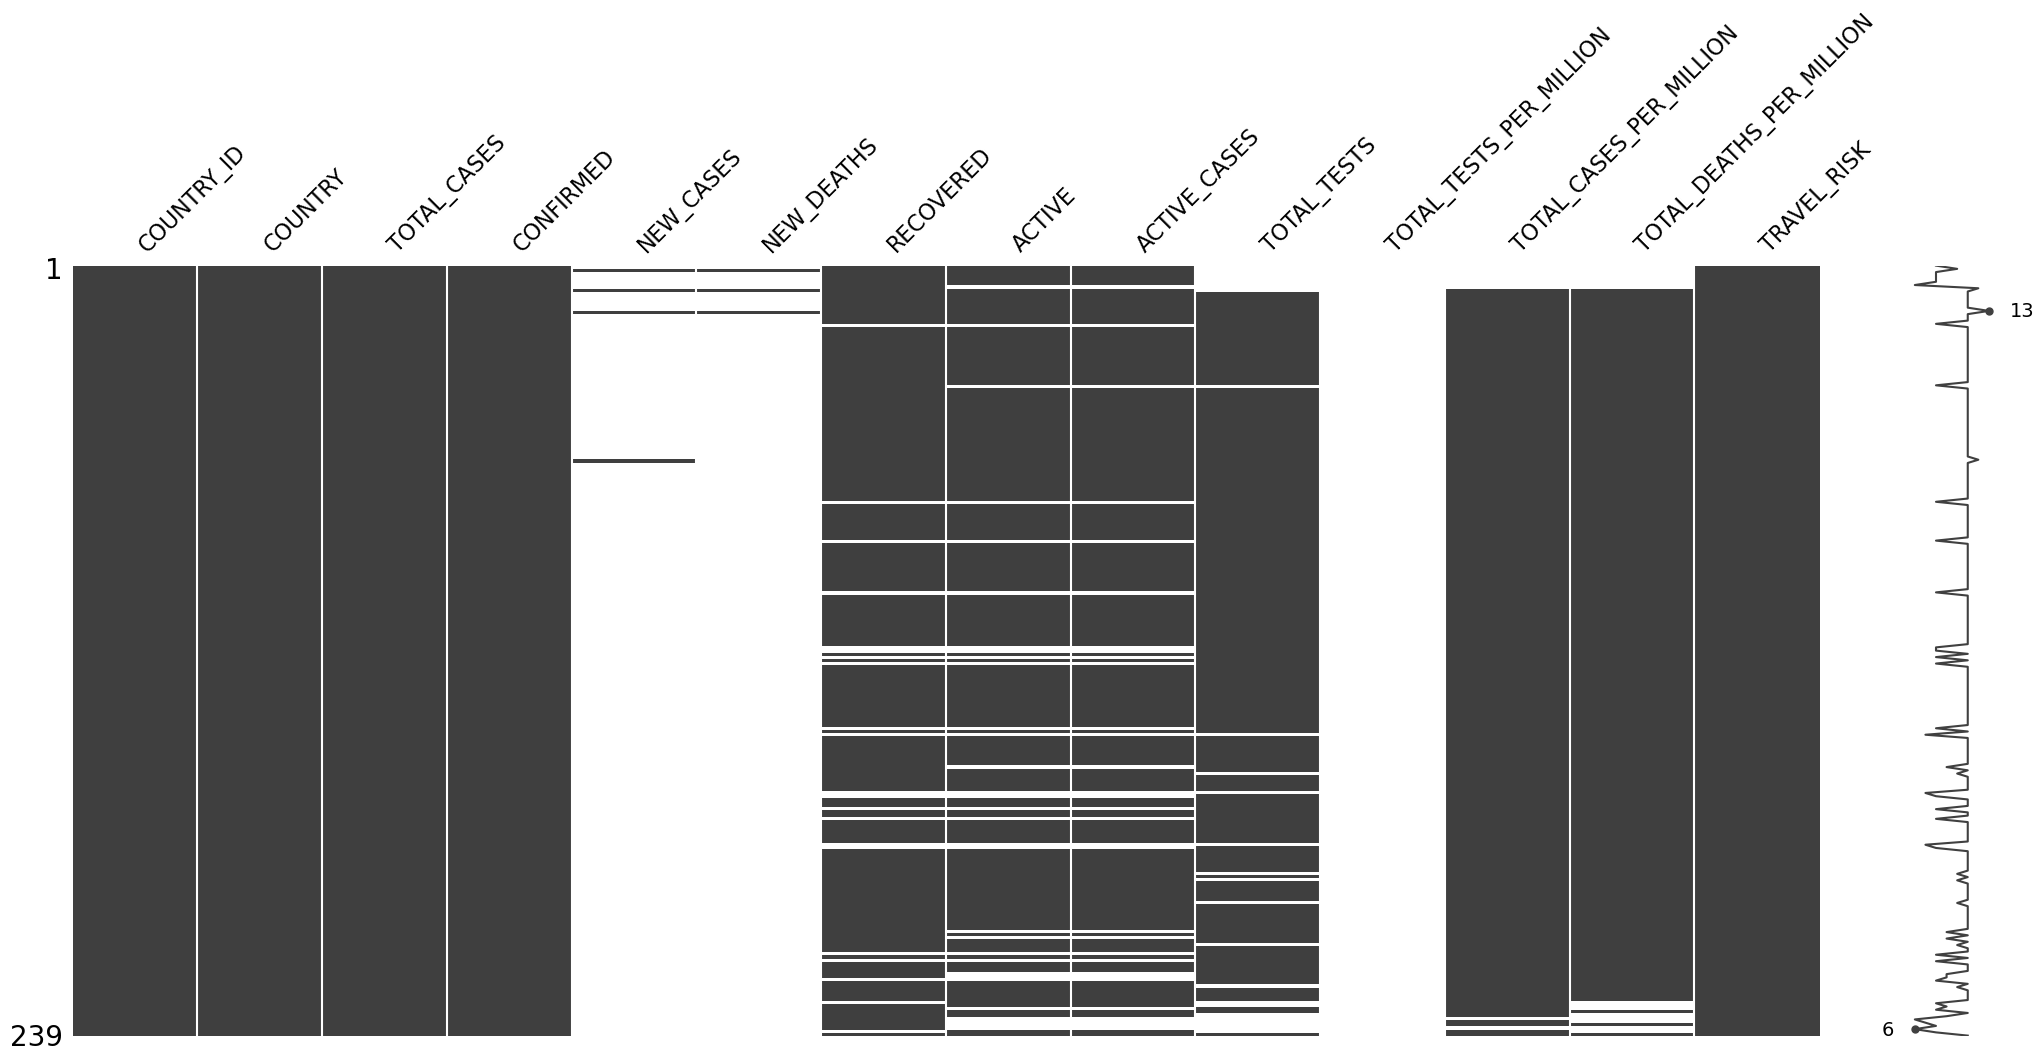

In [40]:
# Q 5: 5 points
msno.matrix(df_covid)

In [41]:
# Q 6: 5 points
# if not used f-string: -1
print(f'number of missing values:{df_covid.isna().sum().sum()}')

number of missing values:843


In [42]:
# Q 7: 10 points
# if not inplace: -5
df_covid.drop(columns = ['NEW_CASES', 
                         'NEW_DEATHS', 
                         'TOTAL_TESTS_PER_MILLION'], inplace=True)

In [43]:
# Q 8: 20 points.
# if they define a new dataframe: -5
# if not in place -5
df_covid.drop(df_covid.index[0:8], inplace=True)
df_covid

,COUNTRY_ID,COUNTRY,TOTAL_CASES,CONFIRMED,RECOVERED,ACTIVE,ACTIVE_CASES,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,TOTAL_DEATHS_PER_MILLION,TRAVEL_RISK
8,9,USA,105649010,105649010,103223189.0,1276828.0,1276828.0,1.169116e+09,315554.0,3432.0,low risk
9,10,India,44690936,44690936,44156345.0,3809.0,3809.0,9.196719e+08,31772.0,377.0,high risk
10,11,France,39657165,39657165,39430751.0,61201.0,61201.0,2.714902e+08,604673.0,2519.0,low risk
11,12,Germany,38256003,38256003,37868100.0,218846.0,218846.0,1.223324e+08,456061.0,2015.0,low risk
12,13,Brazil,37085520,37085520,36249161.0,137049.0,137049.0,6.377617e+07,172208.0,3247.0,medium risk
...,...,...,...,...,...,...,...,...,...,...,...
234,235,Vatican City,29,29,29.0,NaN,NaN,NaN,36295.0,NaN,low risk
235,236,Western Sahara,10,10,9.0,NaN,NaN,NaN,16.0,2.0,high risk
236,237,MS Zaandam,9,9,7.0,NaN,NaN,NaN,NaN,NaN,high risk
237,238,Tokelau,5,5,NaN,5.0,5.0,NaN,3628.0,NaN,low risk


In [47]:
# Q 9: 10 points
# not using f-string: -3
temp = df_covid.CONFIRMED.gt(1_000_000).sum()
print(f'number of rows with more than 1_000_000: {temp}')

number of rows with more than 1_000_000: 73


In [51]:
# Q 10: 20 points
# no f-string: -3
temp = df_covid.TOTAL_CASES.gt(df_covid.TOTAL_CASES.mean()).mean()
print(f'% countries with more than avg total cases: {temp:.2%}')

% countries with more than avg total cases: 17.32%


In [60]:
# Q 11: 30 points
# note: any kind of inner/outer/left joins are fine
# they can join on COUNTRY or COUNTRY ID
# some may try to change COUNTRY ID to COUNTRY_ID
# others may try to use left_on and right_on

df_covid_merged = df_covid.merge(
    df_covid_pop,
    left_on = 'COUNTRY_ID',
    right_on = 'COUNTRY_ID',
    how = 'inner')


In [37]:
# Q 12: 10 points
# if they use inner/left join, there is no need for any action here
# if they use outer join, they need to drop the first 8 rows 
# because it will create missing values
# deduct 8 points if
  # they try to replace with 0, use ffill, bfill
  # or try to interpolate


Text(0.5, 0.98, 'Deaths vs Population')

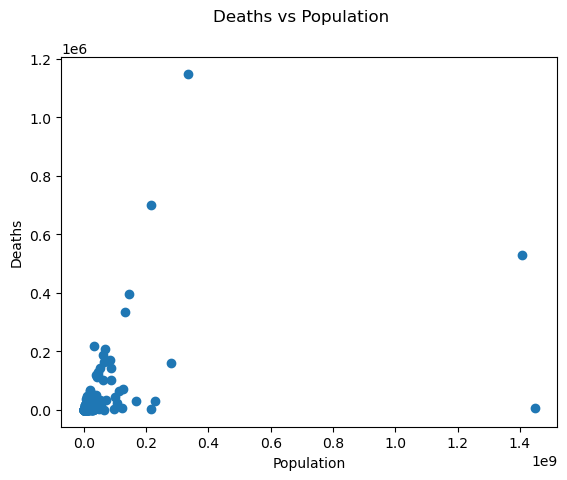

In [66]:
# Q 13: 20 points
# if they use ANY other kind of chart, deduct 15 points please
# if they dont use fig, ax: deduct 15 points
# if they use seaborn, deduct 15 points
# if they use pd.plot: deduct 15 points please
# if they dont try to add info:
# no xlabel: -2
# no y label: -2
# no fig title: -2
# some may try to set a ax title instead of fig subtitle. 
# That works too
fig , ax = plt.subplots()
ax.scatter(df_covid_merged.POPULATION, df_covid_merged.DEATHS)
ax.set(xlabel = 'Population',
      ylabel = 'Deaths')
fig.suptitle('Deaths vs Population')

In [68]:
# Q 14: 20 points. 
# If they dont select these specific columns: -5
df_covid_merged[['ACTIVE', 'TOTAL_CASES', 
                 'DEATHS', 'POPULATION']].corr()


,ACTIVE,TOTAL_CASES,DEATHS,POPULATION
ACTIVE,1.000000,0.308945,0.126556,0.069369
TOTAL_CASES,0.308945,1.000000,0.879946,0.374565
DEATHS,0.126556,0.879946,1.000000,0.411411
POPULATION,0.069369,0.374565,0.411411,1.000000


<AxesSubplot:>

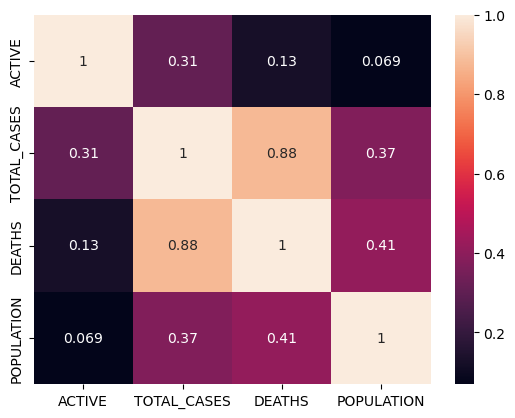

In [69]:
# Q 15: 20 points
# if no annotation: -5
# if not selected specific columns : -5
import seaborn as sns

sns.heatmap(df_covid_merged[['ACTIVE', 'TOTAL_CASES', 
                 'DEATHS', 'POPULATION']].corr(), annot = True)

In [80]:
# Q 16: 20 points
# if they try to fill missing values with 0: -5
# if they write everything correctly; but dont use remove_na = True: -5
# if they write a note explaning p-values: good. Otherwise: -8
import pingouin as pg
pg.linear_regression(df_covid_merged[
    ['TOTAL_CASES',
    'ACTIVE',
    'POPULATION']], df_covid_merged.DEATHS, remove_na=True   )


,names,pval
0,Intercept,0.000000e+00
1,TOTAL_CASES,1.093050e-63
2,ACTIVE,6.089059e-06
3,POPULATION,1.034399e-02


In [81]:
# Q 17: 20
# they may use other methods; as long as they get the numbers
# we are good
df_covid_merged.TRAVEL_RISK.value_counts()

low risk       126
medium risk     58
high risk       47
Name: TRAVEL_RISK, dtype: int64

In [82]:
# Q 18: 20 points
# if the result doesn't look like the below, -10
# if code doesnt work: -15

df_covid_merged.pivot_table(index = 'TRAVEL_RISK',
                           values = 'DEATHS',
                           aggfunc = ['min','mean','max'])


,min,mean,max
,DEATHS,DEATHS,DEATHS
TRAVEL_RISK,,,
high risk,1.0,42060.468085,530782.0
low risk,1.0,23595.675000,1148993.0
medium risk,13.0,34553.758621,699310.0


<AxesSubplot:xlabel='TRAVEL_RISK', ylabel='POPULATION'>

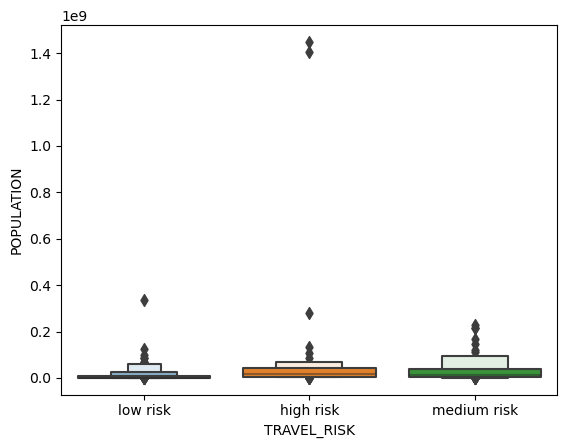

In [83]:
# Q 19: 20
# any other type of plot: -20
# if they try to set risk level on y axis, it is fine
# if they try to get rid of 'outliers', that is fine too
sns.boxenplot(x = 'TRAVEL_RISK', 
              y= 'POPULATION',
             data = df_covid_merged)

### Please run all the cells, make sure your file name is `firstname_lastname_section_number_version` before submitting it